In [ ]:
import pandas as pd
import numpy as np

# Load the data
df_rd = pd.read_csv("fed_rd_year&gdp.csv")
df_rd
print(df_rd.columns)


Index(['department', '1976_gdp1790000000000.0', '1977_gdp2028000000000.0',
       '1978_gdp2278000000000.0', '1979_gdp2570000000000.0',
       '1980_gdp2797000000000.0', '1981_gdp3138000000000.0',
       '1982_gdp3314000000000.0', '1983_gdp3541000000000.0',
       '1984_gdp3953000000000.0', '1985_gdp4270000000000.0',
       '1986_gdp4536000000000.0', '1987_gdp4782000000000.0',
       '1988_gdp5155000000000.0', '1989_gdp5570000000000.0',
       '1990_gdp5915000000000.0', '1991_gdp6110000000000.0',
       '1992_gdp6435000000000.0', '1993_gdp6795000000000.0',
       '1994_gdp7198000000000.0', '1995_gdp7583000000000.0',
       '1996_gdp7978000000000.0', '1997_gdp8483000000000.0',
       '1998_gdp8955000000000.0', '1999_gdp9511000000000.0',
       '2000_gdp10148000000000.0', '2001_gdp10565000000000.0',
       '2002_gdp10877000000000.0', '2003_gdp11332000000000.0',
       '2004_gdp12089000000000.0', '2005_gdp12889000000000.0',
       '2006_gdp13685000000000.0', '2007_gdp14323000000000.0',
  

In this step, I used pd.melt() to convert from a wide to a long format. This allows for much easier viewing as each variable forms a column, each observation forms a row, and each type of observational unit forms a table.  

In [46]:
df_rd_melted = pd.melt(df_rd, id_vars = ['department'],
                       value_vars = ['1976_gdp1790000000000.0', '1977_gdp2028000000000.0',
       '1978_gdp2278000000000.0', '1979_gdp2570000000000.0',
       '1980_gdp2797000000000.0', '1981_gdp3138000000000.0',
       '1982_gdp3314000000000.0', '1983_gdp3541000000000.0',
       '1984_gdp3953000000000.0', '1985_gdp4270000000000.0',
       '1986_gdp4536000000000.0', '1987_gdp4782000000000.0',
       '1988_gdp5155000000000.0', '1989_gdp5570000000000.0',
       '1990_gdp5915000000000.0', '1991_gdp6110000000000.0',
       '1992_gdp6435000000000.0', '1993_gdp6795000000000.0',
       '1994_gdp7198000000000.0', '1995_gdp7583000000000.0',
       '1996_gdp7978000000000.0', '1997_gdp8483000000000.0',
       '1998_gdp8955000000000.0', '1999_gdp9511000000000.0',
       '2000_gdp10148000000000.0', '2001_gdp10565000000000.0',
       '2002_gdp10877000000000.0', '2003_gdp11332000000000.0',
       '2004_gdp12089000000000.0', '2005_gdp12889000000000.0',
       '2006_gdp13685000000000.0', '2007_gdp14323000000000.0',
       '2008_gdp14752000000000.0', '2009_gdp14415000000000.0',
       '2010_gdp14799000000000.0', '2011_gdp15379000000000.0',
       '2012_gdp16027000000000.0', '2013_gdp16516000000000.0',
       '2014_gdp17244000000000.0', '2015_gdp17983000000000.0',
       '2016_gdp18470000000000.0', '2017_gdp19177000000000.0'],
                       var_name = 'Year_GDP',
                       value_name = 'R&D Budget')
df_rd_melted

,department,Year_GDP,R&D Budget
0,DHS,1976_gdp1790000000000.0,NaN
1,DOC,1976_gdp1790000000000.0,8.190000e+08
2,DOD,1976_gdp1790000000000.0,3.569600e+10
3,DOE,1976_gdp1790000000000.0,1.088200e+10
4,DOT,1976_gdp1790000000000.0,1.142000e+09
...,...,...,...
583,NIH,2017_gdp19177000000000.0,3.305200e+10
584,NSF,2017_gdp19177000000000.0,6.040000e+09
585,Other,2017_gdp19177000000000.0,1.553000e+09
586,USDA,2017_gdp19177000000000.0,2.625000e+09


In this step, I split the Year_GDP column. This column contains the two variables year and GDP, which does not align with the tidy data principle of each variable having its own column. After the split, columns "Year" and "GDP" are created, but I still have to delete the original "Year_GDP" column, which I do to maintain clean data. I then rearranged the order of the columns in a way that made more sense.

In [47]:
# Split the year and GDP column
df_rd_melted[['Year', 'GDP']] = df_rd_melted['Year_GDP'].str.split('_gdp', expand = True)

# Drop the Year_GDP column
df_rd_melted = df_rd_melted.drop(columns = ['Year_GDP'])

# Rearrange the columns
df_rd_melted = df_rd_melted[['department', 'Year', 'GDP', 'R&D Budget']]

df_rd_melted


,department,Year,GDP,R&D Budget
0,DHS,1976,1790000000000.0,NaN
1,DOC,1976,1790000000000.0,8.190000e+08
2,DOD,1976,1790000000000.0,3.569600e+10
3,DOE,1976,1790000000000.0,1.088200e+10
4,DOT,1976,1790000000000.0,1.142000e+09
...,...,...,...,...
583,NIH,2017,19177000000000.0,3.305200e+10
584,NSF,2017,19177000000000.0,6.040000e+09
585,Other,2017,19177000000000.0,1.553000e+09
586,USDA,2017,19177000000000.0,2.625000e+09


In this next step, I remove the decimal point and trailing zeros in the GDP column because they are distracting.

In [ ]:
# Remove the decimal point and trailing zeros in the GDP column
df_rd_melted['GDP'] = df_rd_melted['GDP'].str.replace('.0', '', regex=False)
df_rd_melted

,department,Year,GDP,R&D Budget
0,DHS,1976,1790000000000,NaN
1,DOC,1976,1790000000000,8.190000e+08
2,DOD,1976,1790000000000,3.569600e+10
3,DOE,1976,1790000000000,1.088200e+10
4,DOT,1976,1790000000000,1.142000e+09
...,...,...,...,...
583,NIH,2017,19177000000000,3.305200e+10
584,NSF,2017,19177000000000,6.040000e+09
585,Other,2017,19177000000000,1.553000e+09
586,USDA,2017,19177000000000,2.625000e+09


In the following cells, I create two visualizations of the data, as data itself cannot always tell the full story, even if it is tidy. More analysis is needed to see the relationships that data conveys.

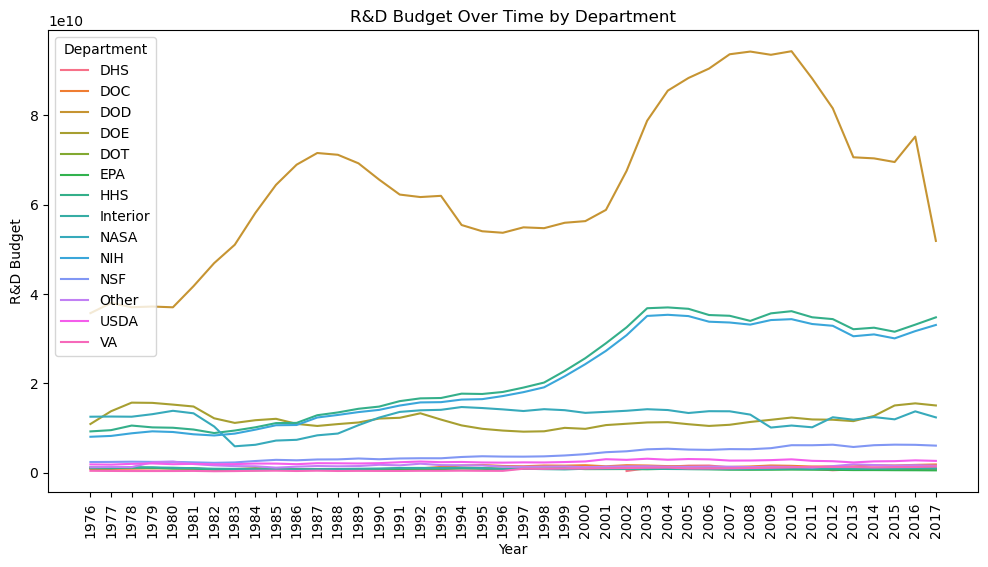

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line Plot of R&D Budget Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_rd_melted, x='Year', y='R&D Budget', hue='department')
plt.title('R&D Budget Over Time by Department')
plt.xlabel('Year')
plt.ylabel('R&D Budget')
plt.xticks(rotation=90)
plt.legend(title='Department')
plt.show()

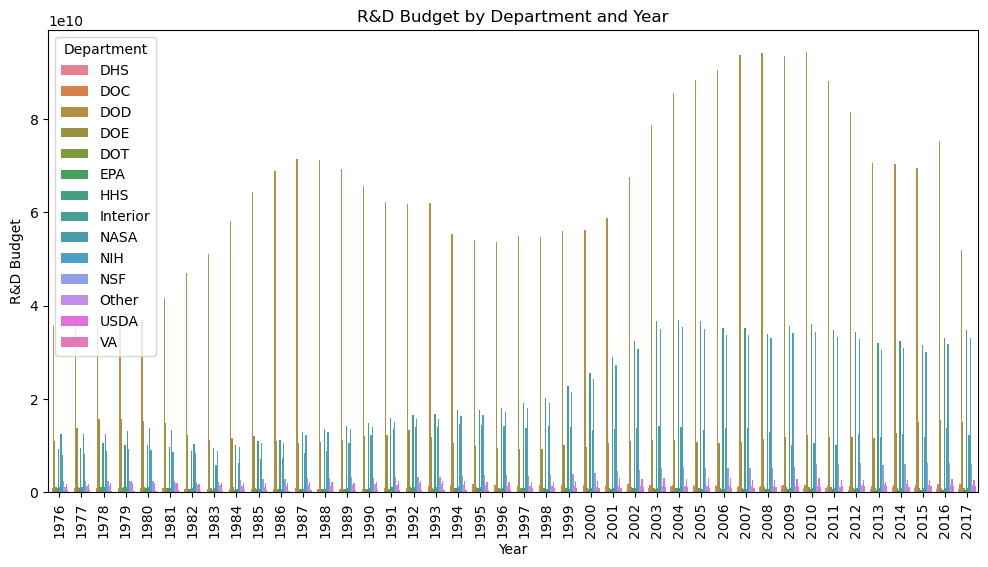

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_rd_melted, x='Year', y='R&D Budget', hue='department')
plt.title('R&D Budget by Department and Year')
plt.xlabel('Year')
plt.ylabel('R&D Budget')
plt.xticks(rotation=90)
plt.legend(title='Department')
plt.show()

In the final section, I created a table that aggregates some of the table to show an easier to digest and more general form of the data. This particular table displays the mean of each department's R&D Budget because there are too many rows to make general comparisons across departments.

In [ ]:
# Creating an aggregate function with pivot_table
# Creating a table that displays the mean R&D budget by department over the entire time period
df_rd_pivot = df_rd_melted.pivot_table(index='department', values='R&D Budget', aggfunc='mean')
df_rd_pivot

,R&D Budget
department,
DHS,9.948750e+08
DOC,1.231500e+09
DOD,6.468519e+10
DOE,1.188338e+10
DOT,9.177857e+08
EPA,7.504286e+08
HHS,2.229676e+10
Interior,9.005714e+08
NASA,1.214026e+10
